In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.colors as colors
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd
from os import path
import time
from scipy.ndimage import gaussian_filter

In [2]:
%matplotlib notebook

In [3]:
npd.triton_init('lockin865', 'lockin830', 'lockin830_2', 'srframe', 'k2182')
station = qc.Station(triton, lockin865, lockin830, lockin830_2, srframe, k2182)

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.02s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 0.37s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.05s
Connected to: Stanford_Research_Systems SR830 (serial:s/n31562, firmware:ver1.07) in 0.04s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.96s
Connected to: KEITHLEY INSTRUMENTS INC. 2182A (serial:4319846, firmware:C06  /A02) in 0.04s


In [4]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1
srframe.volt_p7.step = 0.2
srframe.volt_p7.inter_delay = 0.1
lockin865.amplitude.step = 0.1 
lockin865.amplitude.inter_delay = 0.1
lockin830.amplitude.step = 0.1
lockin830.amplitude.inter_delay = 0.1
lockin830_2.amplitude.step = 0.1
lockin830_2.amplitude.inter_delay = 0.1

100 MOhm resistor

In [30]:
triton.MC_cernox_temp()

69.8324

In [59]:
triton.read_temps()

MC - on:  0.034164 K
MC_cernox - on:  321.181 K
still - on:  0.89312 K
cold_plate - on:  0.0928143 K
magnet - on:  4.33245 K
PT2h - on:  3.38867 K
PT2p - on:  3.63865 K
PT1h - on:  48.3236 K
PT1p - on:  65.739 K


In [54]:
triton.ask('READ:SYS:DR:ACTN')

'STAT:SYS:DR:ACTN:NONE'

In [46]:
triton.read_valves()

V1:  OPEN
V2:  CLOSE
V3:  OPEN
V4:  OPEN
V5:  OPEN
V6:  CLOSE
V7:  CLOSE
V8:  CLOSE
V9:  CLOSE


In [58]:
triton.read_pressures()

P1:  14.5337
P2:  795.16
P3:  0.101
P4:  4.7
P5:  131.688
POVC:  0.0003


In [48]:
triton.fullcooldown()

# Measuring S3

Out of plane magnetic field orientation, so we can get landau fans and such

Just made it to 25 mK. Unplugged all the temperature sensors

Measure 35-34 with lockin865, 34-33 with lockin830, and 40-41 with lockin830_2

Set topgate to -1 to be able to access both full filling points at -5.5 to 5Vbg

In [60]:
bgvals = np.linspace(-5.5, 5, 211)
srframe.volt_p5(-1)
srframe.volt_p1(-5.5)
time.sleep(25)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, bgvals, 1.4, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_bgsweep_-1Vtg_1nA', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-10-21 10:20:38
DataSet:
   location = 'data/2020-10-21/#001_S3_865_35-34_830_34-33_8302_40-41_bgsweep_-1Vtg_1nA_10-20-33'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (211,)
   Measured | lockin865_X         | X            | (211,)
   Measured | lockin865_Y         | Y            | (211,)
   Measured | lockin830_X         | X            | (211,)
   Measured | lockin830_Y         | Y            | (211,)
   Measured | lockin830_2_X       | X            | (211,)
   Measured | lockin830_2_Y       | Y            | (211,)
Finished at 2020-10-21 10:26:18


Double check the 2D sweep (somewhat rough, topgate 3 to -5V, backgate -5.5 to 5V) to make sure it's the same

Adjusting the resolution on the lockins a little

In [61]:
bgvals = np.linspace(5, -5.6, 107)
tgvals = np.linspace(3, -5, 81)
data2, plot2 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2dsweep_baseT_1nA', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-10-21 10:37:26
DataSet:
   location = 'data/2020-10-21/#002_S3_865_35-34_830_34-33_8302_40-41_2dsweep_baseT_1nA_10-37-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (81,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (81, 107)
   Measured | lockin865_X         | X            | (81, 107)
   Measured | lockin865_Y         | Y            | (81, 107)
   Measured | lockin830_X         | X            | (81, 107)
   Measured | lockin830_Y         | Y            | (81, 107)
   Measured | lockin830_2_X       | X            | (81, 107)
   Measured | lockin830_2_Y       | Y            | (81, 107)
Finished at 2020-10-21 11:06:21
Keyboard Interrupt


stop the program switch to 10MOhm resistor for backgate

In [62]:
bgvals = np.linspace(5, -5.6, 107)
tgvals = np.linspace(3, -5, 81)
data2, plot2 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2dsweep_baseT_1nA', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-10-21 11:09:48
DataSet:
   location = 'data/2020-10-21/#003_S3_865_35-34_830_34-33_8302_40-41_2dsweep_baseT_1nA_11-09-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (81,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (81, 107)
   Measured | lockin865_X         | X            | (81, 107)
   Measured | lockin865_Y         | Y            | (81, 107)
   Measured | lockin830_X         | X            | (81, 107)
   Measured | lockin830_Y         | Y            | (81, 107)
   Measured | lockin830_2_X       | X            | (81, 107)
   Measured | lockin830_2_Y       | Y            | (81, 107)
Finished at 2020-10-21 11:17:41
Keyboard Interrupt


use 1Mohm limit the range

In [63]:
bgvals = np.linspace(4, -4.5, 86)
tgvals = np.linspace(2, -4, 61)
data3, plot3 = npd.twod_param_sweep(srframe.volt_p5, tgvals, srframe.volt_p1, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=0.7, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2dsweep_baseT_1nA', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-10-21 11:23:49
DataSet:
   location = 'data/2020-10-21/#004_S3_865_35-34_830_34-33_8302_40-41_2dsweep_baseT_1nA_11-23-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (61,)
   Setpoint | srframe_volt_p1_set | volt_p1      | (61, 86)
   Measured | lockin865_X         | X            | (61, 86)
   Measured | lockin865_Y         | Y            | (61, 86)
   Measured | lockin830_X         | X            | (61, 86)
   Measured | lockin830_Y         | Y            | (61, 86)
   Measured | lockin830_2_X       | X            | (61, 86)
   Measured | lockin830_2_Y       | Y            | (61, 86)
Finished at 2020-10-21 11:28:23
Keyboard Interrupt


still not good

do the same measurement at the biginning again

In [65]:
bgvals = np.linspace(-5.5, 5, 211)
srframe.volt_p5(-1)
srframe.volt_p1(-5.5)
time.sleep(25)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, bgvals, 1.4, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_bgsweep_-1Vtg_1nA', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-10-21 11:33:06
DataSet:
   location = 'data/2020-10-21/#005_S3_865_35-34_830_34-33_8302_40-41_bgsweep_-1Vtg_1nA_11-33-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (211,)
   Measured | lockin865_X         | X            | (211,)
   Measured | lockin865_Y         | Y            | (211,)
   Measured | lockin830_X         | X            | (211,)
   Measured | lockin830_Y         | Y            | (211,)
   Measured | lockin830_2_X       | X            | (211,)
   Measured | lockin830_2_Y       | Y            | (211,)
Finished at 2020-10-21 11:38:44


In [66]:
bgvals = np.linspace(-5.5, 5, 211)#have topgate to 1MOhm
srframe.volt_p5(-1)
srframe.volt_p1(-5.5)
time.sleep(25)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, bgvals, 1.4, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_bgsweep_-1Vtg_1nA', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-10-21 11:45:06
DataSet:
   location = 'data/2020-10-21/#006_S3_865_35-34_830_34-33_8302_40-41_bgsweep_-1Vtg_1nA_11-45-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (211,)
   Measured | lockin865_X         | X            | (211,)
   Measured | lockin865_Y         | Y            | (211,)
   Measured | lockin830_X         | X            | (211,)
   Measured | lockin830_Y         | Y            | (211,)
   Measured | lockin830_2_X       | X            | (211,)
   Measured | lockin830_2_Y       | Y            | (211,)
Finished at 2020-10-21 11:50:43


In [5]:
# figured out the zero-field slope by fitting the CNP peaks in the 2d diagram
zfieldslope = 0.6629105490080421

In [6]:
def zeroDsweep(vbg):
    """Defined with vbg as volt_p1, vtg as volt_p5. Just enter the back gate voltage. The main range 
    of the flat bands is around -4 to 2Vbg"""
    srframe.volt_p1(vbg)
    srframe.volt_p5(zfieldslope*vbg)
    
zeroDparam = qc.Parameter('zeroDparam', set_cmd=zeroDsweep, label='Vbg', unit='V')

In [70]:
zeroDparam(-4)

In [71]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data4, plot4 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 11:56:10
DataSet:
   location = 'data/2020-10-21/#007_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_11-56-09'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 12:00:57


In [72]:
#measure again

In [73]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data5, plot5 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 12:02:12
DataSet:
   location = 'data/2020-10-21/#008_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_12-02-11'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 12:06:59


In [74]:
bgvals = np.linspace(-4, 2, 301)#measure again
zeroDparam(-4)
time.sleep(25)
data6, plot6 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 12:08:01
DataSet:
   location = 'data/2020-10-21/#009_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_12-08-00'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 12:12:48


In [75]:
bgvals = np.linspace(-4, 2, 301)#measure again
zeroDparam(-4)
time.sleep(25)
data7, plot7 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 12:18:53
DataSet:
   location = 'data/2020-10-21/#010_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_12-18-52'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 12:23:40


In [76]:
bgvals = np.linspace(-4, 2, 301)#measure again with 100kOhm backgate
zeroDparam(-4)
time.sleep(25)
data8, plot8 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 12:28:54
DataSet:
   location = 'data/2020-10-21/#011_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_12-28-52'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 12:33:41


In [77]:
bgvals = np.linspace(-4, 2, 301)#measure again with 1Mohm backgate
zeroDparam(-4)
time.sleep(25)
data9, plot9 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 12:39:17
DataSet:
   location = 'data/2020-10-21/#012_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_12-39-16'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 12:44:04


try with no resistor 

In [78]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data10, plot10 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 12:59:48
DataSet:
   location = 'data/2020-10-21/#013_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_12-59-47'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 13:04:34


In [79]:
bgvals = np.linspace(-4, 2, 301)#again
zeroDparam(-4)
time.sleep(25)
data11, plot11 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 13:05:39
DataSet:
   location = 'data/2020-10-21/#014_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_13-05-38'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 13:10:26


In [80]:
bgvals = np.linspace(-4, 2, 301)#again double check
zeroDparam(-4)
time.sleep(25)
data12, plot12 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 13:12:34
DataSet:
   location = 'data/2020-10-21/#015_S3_865_35-34_830_34-33_8302_40-41_1nA_0T_0Dsweep_13-12-33'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 13:17:22


low resistor works now they are on top of each other

# start a fan diagram along D0

In [82]:
lockin865.amplitude(0.2)

In [83]:
bgvals = np.linspace(-4, 2, 301)#again double check
zeroDparam(-4)
time.sleep(25)
data13, plot13 = npd.single_param_sweep(zeroDparam, bgvals, 0.7, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 13:28:18
DataSet:
   location = 'data/2020-10-21/#016_S3_865_35-34_830_34-33_8302_40-41_2nA_0T_0Dsweep_13-28-17'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-21 13:33:06


In [84]:
bgvals = np.linspace(-4, 2, 601)
Bvals = np.linspace(0, 6, 121)
data14, plot14 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0D_0to6T_fieldgate', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-21 13:46:25
Are you sure you want to use the magnet? [y/n]: y
DataSet:
   location = 'data/2020-10-21/#017_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_0to6T_fieldgate_13-46-23'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (121,)
   Setpoint | zeroDparam_set              | zeroDparam       | (121, 601)
   Measured | lockin865_X                 | X                | (121, 601)
   Measured | lockin865_Y                 | Y                | (121, 601)
   Measured | lockin830_X                 | X                | (121, 601)
   Measured | lockin830_Y                 | Y                | (121, 601)
   Measured | lockin830_2_X               | X                | (121, 601)
   Measured | lockin830_2_Y               | Y                | (121, 601)
Finished at 2020-10-22 18:47:07


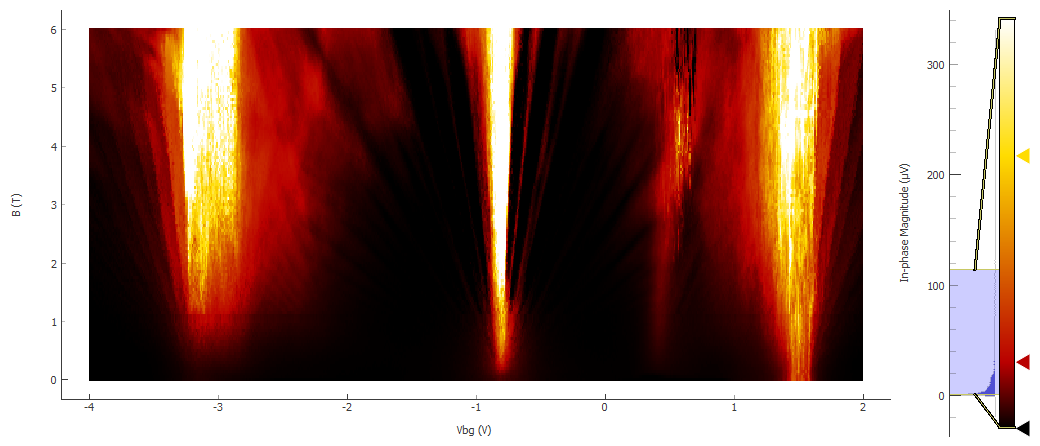

In [85]:
plot14[0]

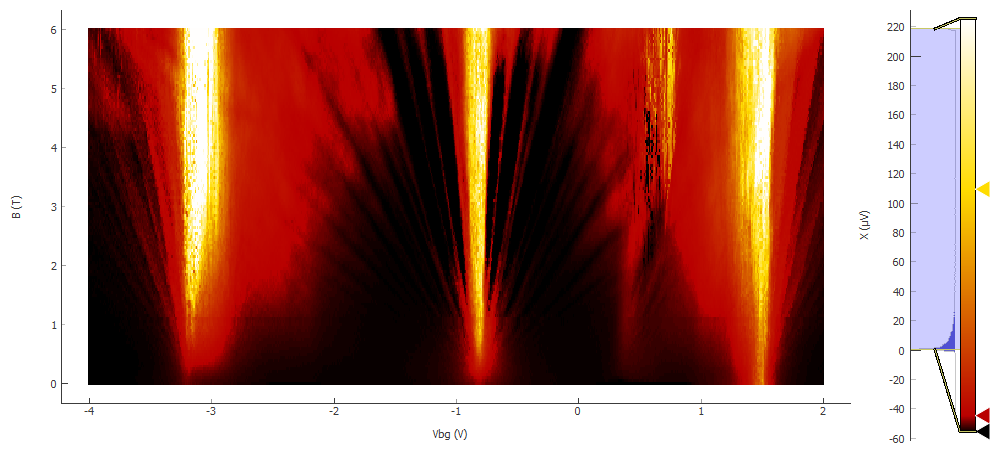

In [87]:
plot14[1]

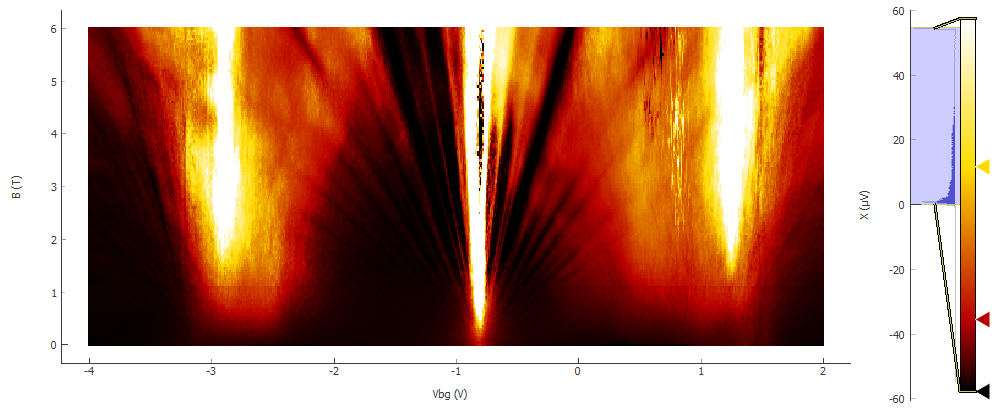

In [88]:
plot14[2]

In [102]:
lockin865.X()

1.1719645272e-06

In [7]:
bgvals = np.linspace(-4, 2, 601)
triton.magnet_POC(1)
Bvals = np.concatenate((np.linspace(6.05, 7.95, 39), [7.998]))
data15, plot15 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6p05to8T_fieldgate', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-22 20:13:52
Are you sure you want to use the magnet? [y/n]: y
DataSet:
   location = 'data/2020-10-22/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6p05to8T_fieldgate_20-13-47'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (40,)
   Setpoint | zeroDparam_set              | zeroDparam       | (40, 601)
   Measured | lockin865_X                 | X                | (40, 601)
   Measured | lockin865_Y                 | Y                | (40, 601)
   Measured | lockin830_X                 | X                | (40, 601)
   Measured | lockin830_Y                 | Y                | (40, 601)
   Measured | lockin830_2_X               | X                | (40, 601)
   Measured | lockin830_2_Y               | Y                | (40, 601)
Finished at 2020-10-23 15:22:54


# 5K D0 fan diagram

In [24]:
triton.pid_range(100)

In [35]:
triton.pid_setpoint(5)

In [13]:
triton.pid_mode(1)

In [36]:
bgvals = np.linspace(-3.3, 1.7, 501)
zeroDparam(-3.3)
time.sleep(25)
data16, plot16 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_8T_0Dsweep_5K', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-23 15:39:48
DataSet:
   location = 'data/2020-10-23/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_8T_0Dsweep_5K_15-39-46'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (501,)
   Measured | lockin865_X    | X            | (501,)
   Measured | lockin865_Y    | Y            | (501,)
   Measured | lockin830_X    | X            | (501,)
   Measured | lockin830_Y    | Y            | (501,)
   Measured | lockin830_2_X  | X            | (501,)
   Measured | lockin830_2_Y  | Y            | (501,)
Finished at 2020-10-23 15:51:05


In [37]:
bgvals = np.linspace(-3.3, 1.7, 501)
triton.magnet_POC(1)
Bvals = np.concatenate(([7.998], np.linspace(7.9, 6.1, 19)))
data17, plot17 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0D_8to6p1T_fieldgate_5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-23 15:55:03
DataSet:
   location = 'data/2020-10-23/#002_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_8to6p1T_fieldgate_5K_15-55-01'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 501)
   Measured | lockin865_X                 | X                | (20, 501)
   Measured | lockin865_Y                 | Y                | (20, 501)
   Measured | lockin830_X                 | X                | (20, 501)
   Measured | lockin830_Y                 | Y                | (20, 501)
   Measured | lockin830_2_X               | X                | (20, 501)
   Measured | lockin830_2_Y               | Y                | (20, 501)
Finished at 2020-10-24 00:54:33


In [38]:
bgvals = np.linspace(-3.3, 1.7, 501)
triton.magnet_POC(0)
Bvals = np.linspace(6, 0, 61)
data18, plot18 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6to0T_fieldgate_5K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-24 00:54:36
DataSet:
   location = 'data/2020-10-24/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6to0T_fieldgate_5K_00-54-34'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 501)
   Measured | lockin865_X                 | X                | (61, 501)
   Measured | lockin865_Y                 | Y                | (61, 501)
   Measured | lockin830_X                 | X                | (61, 501)
   Measured | lockin830_Y                 | Y                | (61, 501)
   Measured | lockin830_2_X               | X                | (61, 501)
   Measured | lockin830_2_Y               | Y                | (61, 501)
Finished at 2020-10-24 13:22:33


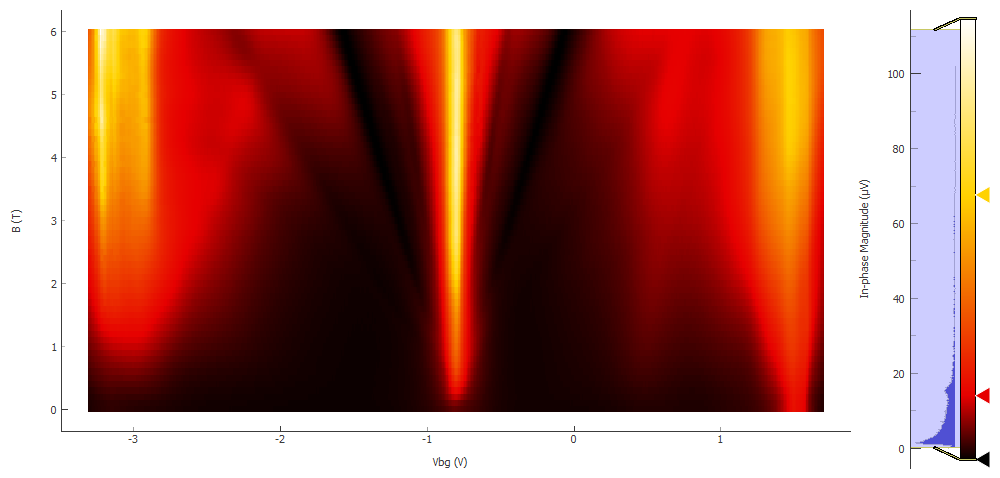

In [40]:
plot18[0]

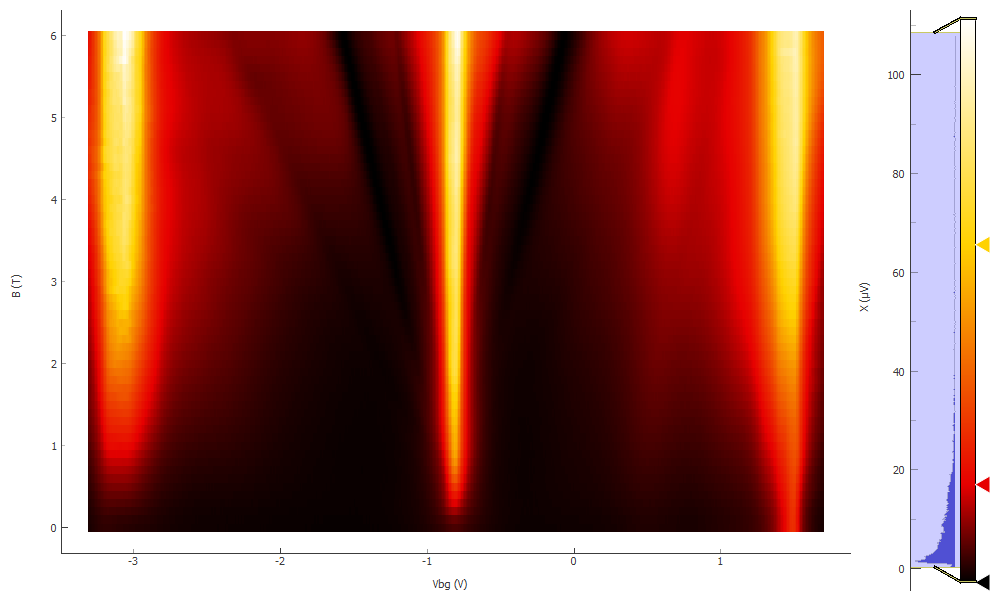

In [41]:
plot18[1]

# 3K D0 fan diagram

In [39]:
triton.pid_setpoint(3)

In [42]:
bgvals = np.linspace(-3.3, 1.7, 501)
triton.magnet_POC(0)
Bvals = np.linspace(0, 6, 61)
data19, plot19 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6to0T_fieldgate_3K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-24 16:15:06
DataSet:
   location = 'data/2020-10-24/#002_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6to0T_fieldgate_3K_16-15-04'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (61,)
   Setpoint | zeroDparam_set              | zeroDparam       | (61, 501)
   Measured | lockin865_X                 | X                | (61, 501)
   Measured | lockin865_Y                 | Y                | (61, 501)
   Measured | lockin830_X                 | X                | (61, 501)
   Measured | lockin830_Y                 | Y                | (61, 501)
   Measured | lockin830_2_X               | X                | (61, 501)
   Measured | lockin830_2_Y               | Y                | (61, 501)
Finished at 2020-10-25 04:34:52


In [43]:
bgvals = np.linspace(-3.3, 1.7, 501)
triton.magnet_POC(1)
Bvals = np.concatenate((np.linspace(6.1, 7.9, 19), [7.998]))
data20, plot20 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6p1to8T_fieldgate_3K', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-25 04:34:54
DataSet:
   location = 'data/2020-10-25/#001_S3_865_35-34_830_34-33_8302_40-41_2nA_0D_6p1to8T_fieldgate_3K_04-34-52'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (20,)
   Setpoint | zeroDparam_set              | zeroDparam       | (20, 501)
   Measured | lockin865_X                 | X                | (20, 501)
   Measured | lockin865_Y                 | Y                | (20, 501)
   Measured | lockin830_X                 | X                | (20, 501)
   Measured | lockin830_Y                 | Y                | (20, 501)
   Measured | lockin830_2_X               | X                | (20, 501)
   Measured | lockin830_2_Y               | Y                | (20, 501)
Finished at 2020-10-25 13:28:28


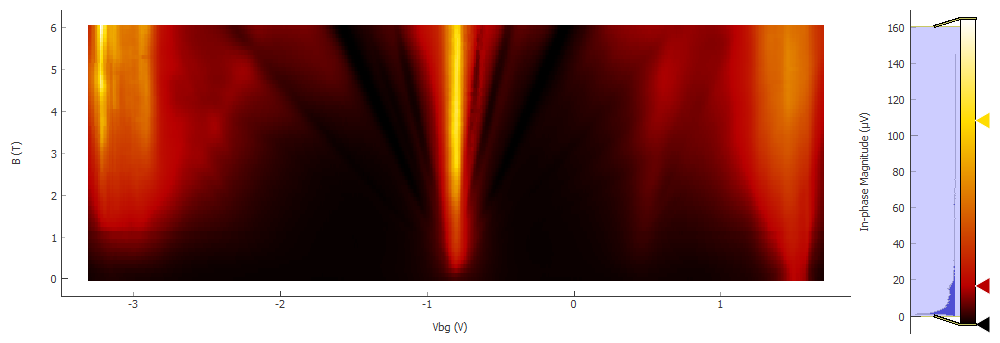

In [49]:
plot19[0]

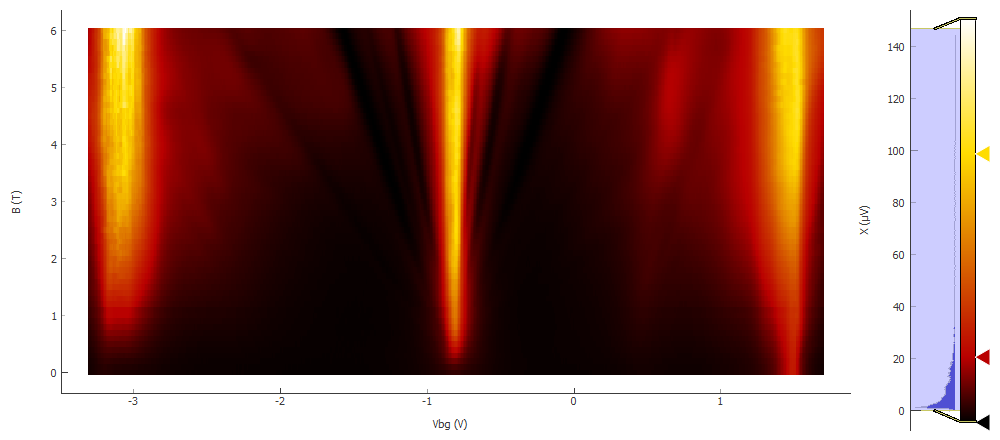

In [50]:
plot19[1]

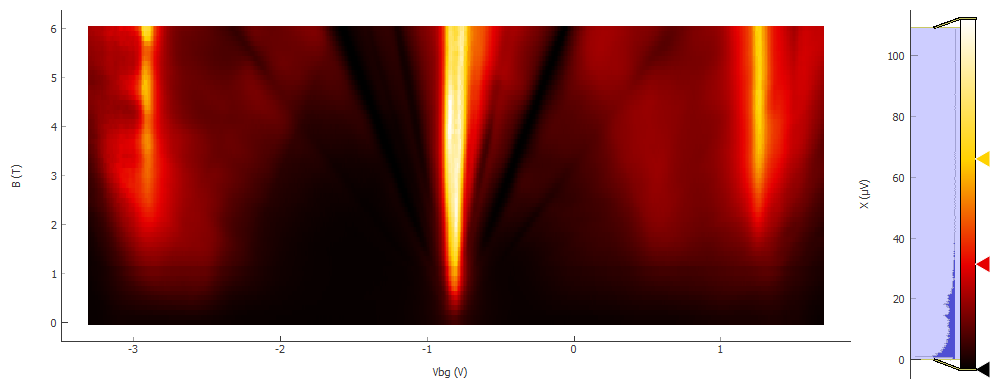

In [51]:
plot19[2]

In [44]:
triton.pid_mode(0)
time.sleep(10)

In [45]:
triton.field_set_stable(0)

In [46]:
triton.condense()

In [48]:
triton.read_temps()

MC - on:  0.0678433 K
MC_cernox - on:  321.181 K
still - on:  0.940421 K
cold_plate - off:  0.0886873 K
magnet - off:  4.30407 K
PT2h - off:  3.39021 K
PT2p - off:  3.61344 K
PT1h - off:  47.796 K
PT1p - off:  64.5958 K


# electron side fraunhofer pattern

In [53]:
lockin865.amplitude(0.1)

In [54]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data21, plot21 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-34_830_34-33_8302_40-41_1nA_-0p8mT_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-25 15:36:40
DataSet:
   location = 'data/2020-10-25/#002_S3_865_35-34_830_34-33_8302_40-41_1nA_-0p8mT_0Dsweep_15-36-39'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-25 15:43:25


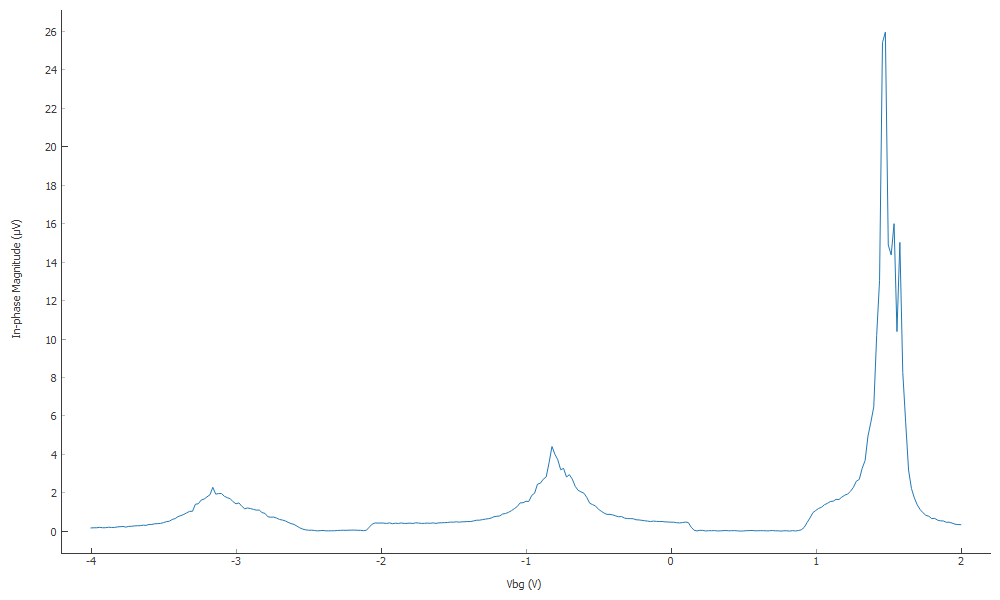

In [55]:
plot21[0]

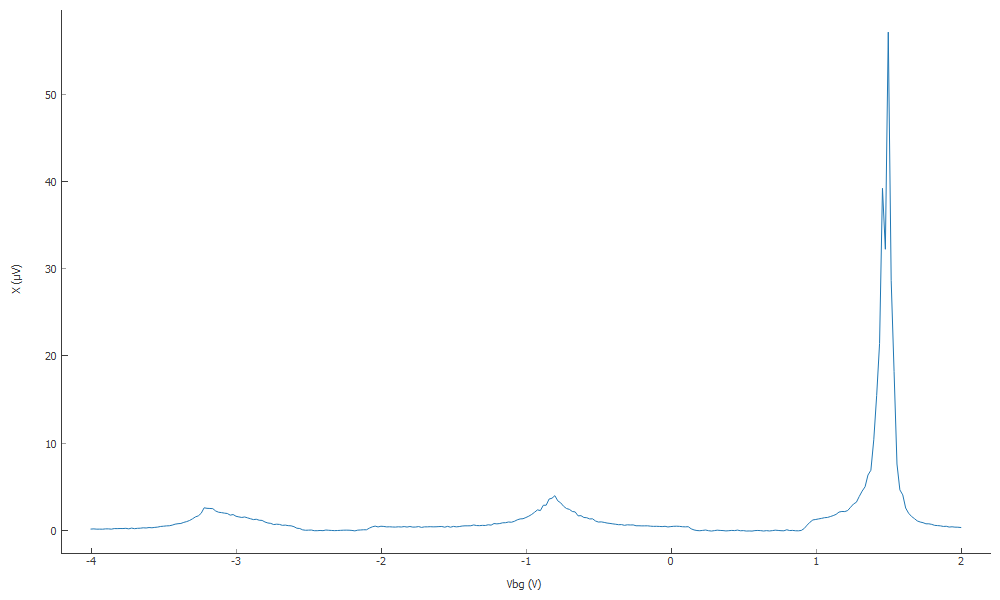

In [56]:
plot21[1]

In [57]:
zeroDparam(0.1)

In [58]:
lockin865.amplitude(0.05)

In [59]:
bgvals = np.linspace(0.1, 1.1, 41)
Ivals = np.linspace(-8, 8, 161)
data22, plot22 = npd.twod_param_sweep(zeroDparam, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_electronD0_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-10-25 15:52:59
DataSet:
   location = 'data/2020-10-25/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_electronD0_baseT_15-52-57'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | zeroDparam_set      | zeroDparam   | (41,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (41, 161)
   Measured | lockin865_X         | X            | (41, 161)
   Measured | lockin865_Y         | Y            | (41, 161)
   Measured | lockin830_X         | X            | (41, 161)
   Measured | lockin830_Y         | Y            | (41, 161)
   Measured | lockin830_2_X       | X            | (41, 161)
   Measured | lockin830_2_Y       | Y            | (41, 161)
Finished at 2020-10-25 18:27:21


In [60]:
zeroDparam(0.375)

In [61]:
triton.magnet_POC(0)

In [62]:
triton.field_set_stable(-0.05)

In [63]:
Bvals = np.linspace(-0.05, 0.05, 51)
Ivals = np.linspace(-8, 8, 161)
data23, plot23 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_0p375_field_Ic_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
triton.field_set_stable(0)

Started at 2020-10-25 18:35:09
DataSet:
   location = 'data/2020-10-25/#004_S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_0p375_field_Ic_baseT_18-35-07'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (51,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (51, 161)
   Measured | lockin865_X                 | X                | (51, 161)
   Measured | lockin865_Y                 | Y                | (51, 161)
   Measured | lockin830_X                 | X                | (51, 161)
   Measured | lockin830_Y                 | Y                | (51, 161)
   Measured | lockin830_2_X               | X                | (51, 161)
   Measured | lockin830_2_Y               | Y                | (51, 161)
Finished at 2020-10-25 20:24:52
Keyboard Interrupt


In [67]:
lockin830_2.sensitivity(2e-6)

In [68]:
triton.field_set_stable(-0.04)

In [69]:
Bvals = np.linspace(-0.04, 0.04, 161)
Ivals = np.linspace(-8, 8, 161)
data24, plot24 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_0p375_field_Ic_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
triton.field_set_stable(0)

Started at 2020-10-25 20:33:28
DataSet:
   location = 'data/2020-10-25/#005_S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_0p375_field_Ic_baseT_20-33-26'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (161,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (161, 161)
   Measured | lockin865_X                 | X                | (161, 161)
   Measured | lockin865_Y                 | Y                | (161, 161)
   Measured | lockin830_X                 | X                | (161, 161)
   Measured | lockin830_Y                 | Y                | (161, 161)
   Measured | lockin830_2_X               | X                | (161, 161)
   Measured | lockin830_2_Y               | Y                | (161, 161)
Finished at 2020-10-26 07:13:00


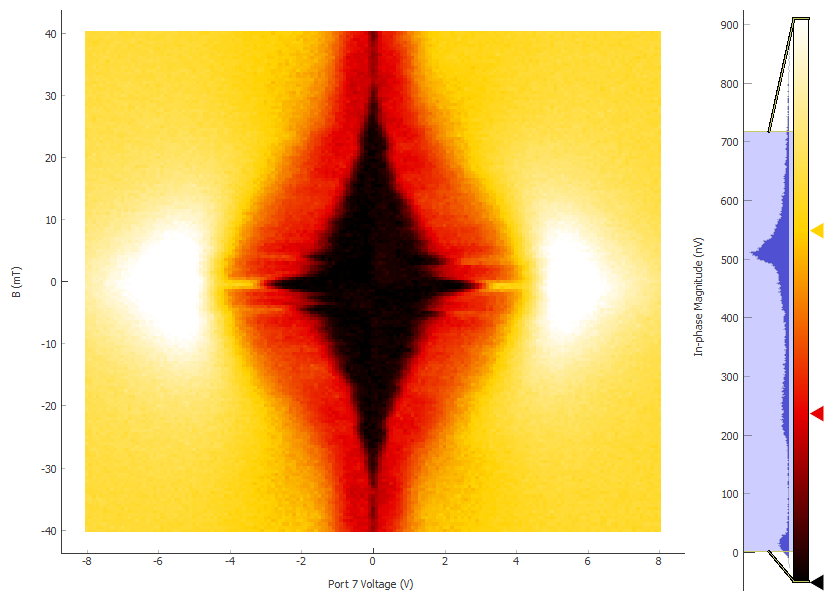

In [80]:
plot24[0]

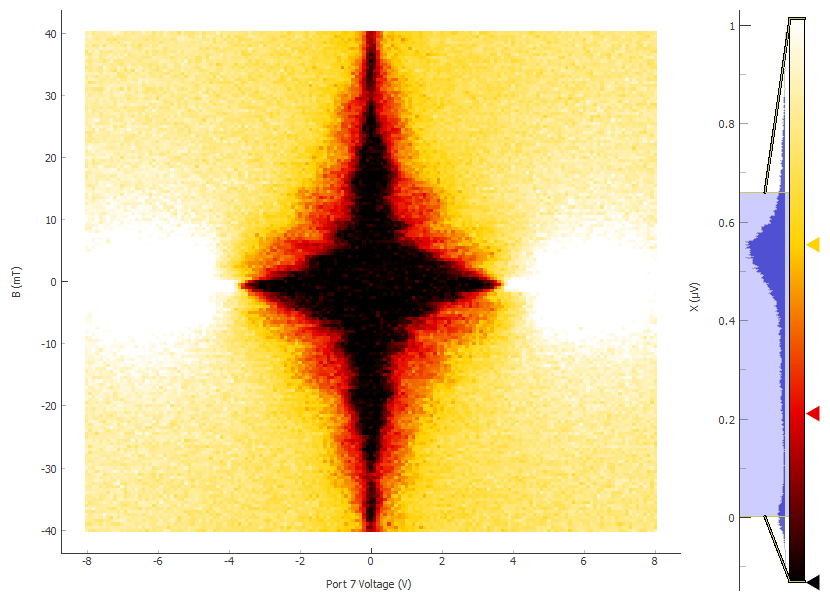

In [81]:
plot24[1]

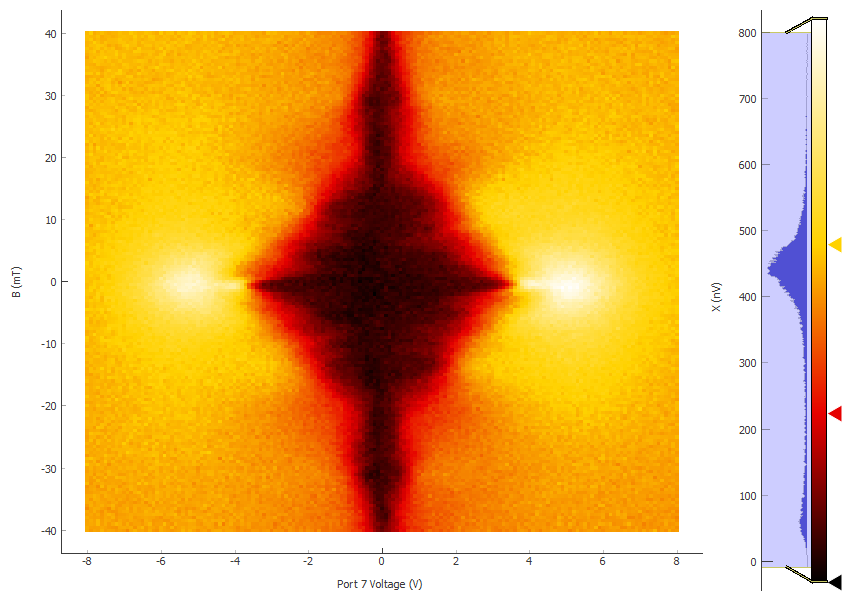

In [82]:
plot24[2]

# hole side frauhofer

In [70]:
triton.field_set_stable(-0.0008)

In [71]:
bgvals = np.linspace(-2, -2.8, 33)
Ivals = np.linspace(-2, 2, 81)
data25, plot25 = npd.twod_param_sweep(zeroDparam, bgvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=15, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_holeD0_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
zeroDparam(0)

Started at 2020-10-26 07:13:36
DataSet:
   location = 'data/2020-10-26/#001_S3_865_35-34_830_34-33_8302_40-41_0p5nA_gate_Ic_holeD0_baseT_07-13-34'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | zeroDparam_set      | zeroDparam   | (33,)
   Setpoint | srframe_volt_p7_set | volt_p7      | (33, 81)
   Measured | lockin865_X         | X            | (33, 81)
   Measured | lockin865_Y         | Y            | (33, 81)
   Measured | lockin830_X         | X            | (33, 81)
   Measured | lockin830_Y         | Y            | (33, 81)
   Measured | lockin830_2_X       | X            | (33, 81)
   Measured | lockin830_2_Y       | Y            | (33, 81)
Finished at 2020-10-26 08:18:23


In [72]:
zeroDparam(-2.375)

In [73]:
Bvals = np.linspace(-0.02, 0.02, 41)
Ivals = np.linspace(-2, 2, 81)
data26, plot26 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_-2p375_field_Ic_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
triton.field_set_stable(0)

Started at 2020-10-26 09:09:23
DataSet:
   location = 'data/2020-10-26/#002_S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_-2p375_field_Ic_baseT_09-09-21'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (41,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (41, 81)
   Measured | lockin865_X                 | X                | (41, 81)
   Measured | lockin865_Y                 | Y                | (41, 81)
   Measured | lockin830_X                 | X                | (41, 81)
   Measured | lockin830_Y                 | Y                | (41, 81)
   Measured | lockin830_2_X               | X                | (41, 81)
   Measured | lockin830_2_Y               | Y                | (41, 81)
Finished at 2020-10-26 10:00:20
Keyboard Interrupt


In [74]:
Bvals = np.linspace(-0.01, 0.01, 81)
Ivals = np.linspace(-2, 2, 161)
data27, plot27 = npd.twod_param_sweep(triton.field_set_stable, Bvals, srframe.volt_p7, Ivals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=20, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_-2p375_field_Ic_baseT', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
srframe.volt_p7(0)
triton.field_set_stable(0)

Started at 2020-10-26 10:06:04
DataSet:
   location = 'data/2020-10-26/#003_S3_865_35-34_830_34-33_8302_40-41_0p5nA_D0_-2p375_field_Ic_baseT_10-06-02'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (81,)
   Setpoint | srframe_volt_p7_set         | volt_p7          | (81, 161)
   Measured | lockin865_X                 | X                | (81, 161)
   Measured | lockin865_Y                 | Y                | (81, 161)
   Measured | lockin830_X                 | X                | (81, 161)
   Measured | lockin830_Y                 | Y                | (81, 161)
   Measured | lockin830_2_X               | X                | (81, 161)
   Measured | lockin830_2_Y               | Y                | (81, 161)
Finished at 2020-10-26 15:15:12


In [75]:
zeroDparam(0)

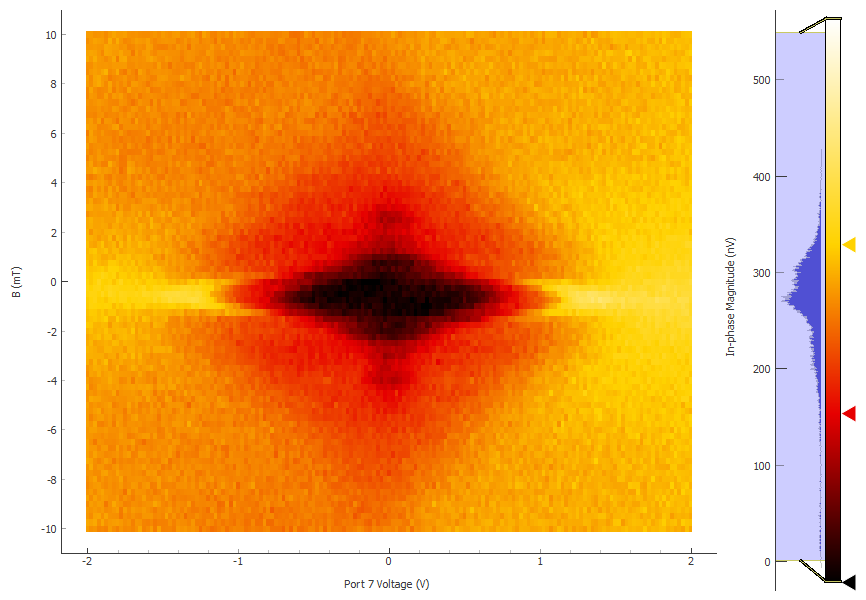

In [76]:
plot27[0]

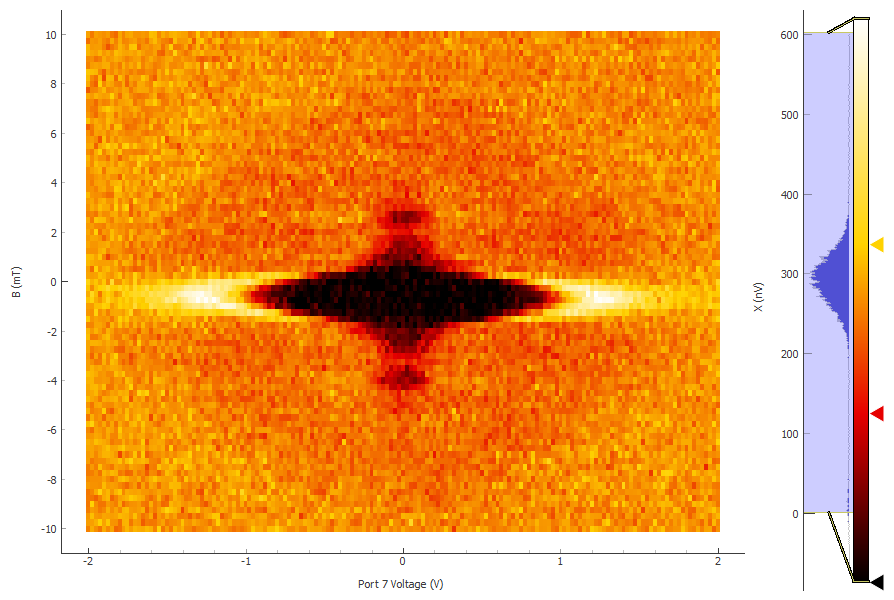

In [77]:
plot27[1]

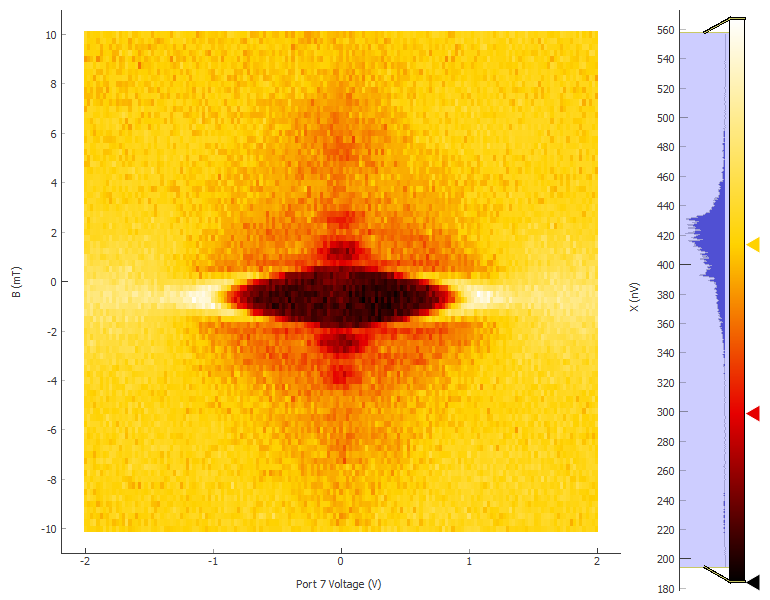

In [78]:
plot27[2]

# base T Rxy fan diagram

In [93]:
lockin865.amplitude(0.3)

In [85]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data28, plot28 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-38_830_34-39_8302_33-40_3nA_0T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-26 15:30:56
DataSet:
   location = 'data/2020-10-26/#004_S3_865_35-38_830_34-39_8302_33-40_3nA_0T_0Dsweep_15-30-55'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-26 15:37:43


In [86]:
triton.field_set_stable(0.5)

In [87]:
bgvals = np.linspace(-4, 2, 301)
zeroDparam(-4)
time.sleep(25)
data29, plot29 = npd.single_param_sweep(zeroDparam, bgvals, 1.1, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, DataName='S3_865_35-38_830_34-39_8302_33-40_3nA_0p5T_0Dsweep', YParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-26 15:42:32
DataSet:
   location = 'data/2020-10-26/#005_S3_865_35-38_830_34-39_8302_33-40_3nA_0p5T_0Dsweep_15-42-30'
   <Type>   | <array_id>     | <array.name> | <array.shape>
   Setpoint | zeroDparam_set | zeroDparam   | (301,)
   Measured | lockin865_X    | X            | (301,)
   Measured | lockin865_Y    | Y            | (301,)
   Measured | lockin830_X    | X            | (301,)
   Measured | lockin830_Y    | Y            | (301,)
   Measured | lockin830_2_X  | X            | (301,)
   Measured | lockin830_2_Y  | Y            | (301,)
Finished at 2020-10-26 15:49:19


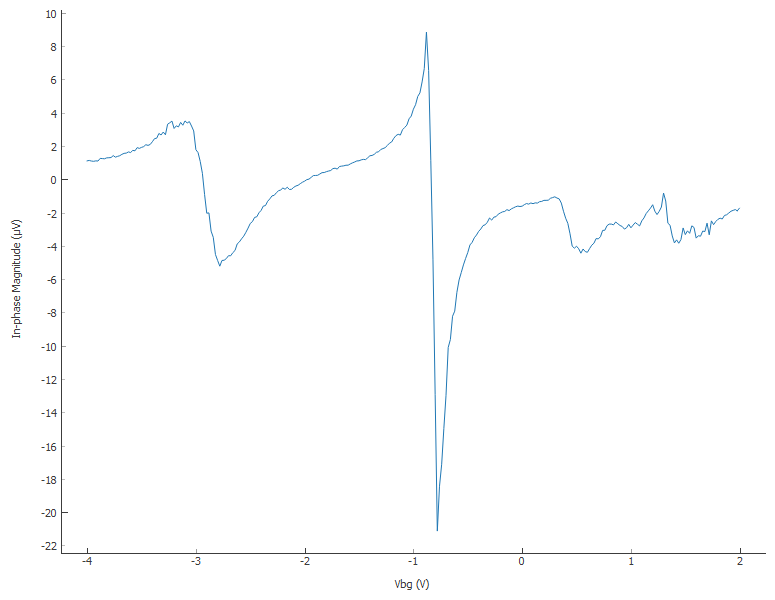

In [88]:
plot29[0]

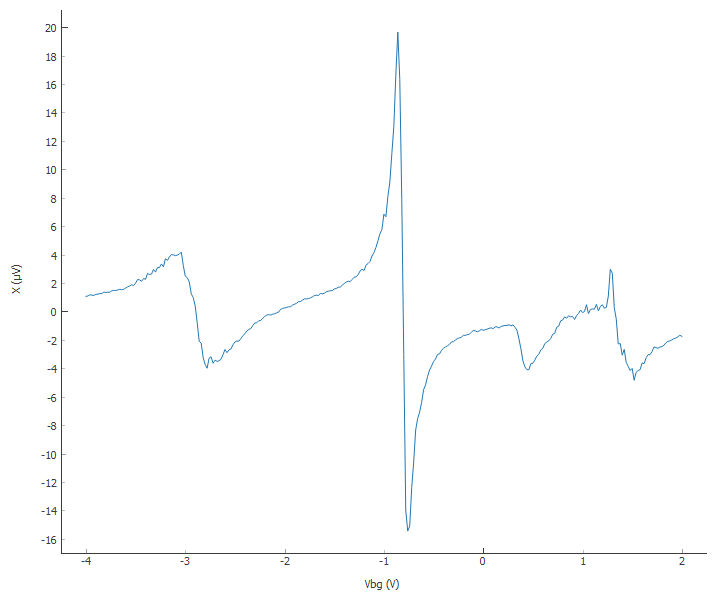

In [89]:
plot29[1]

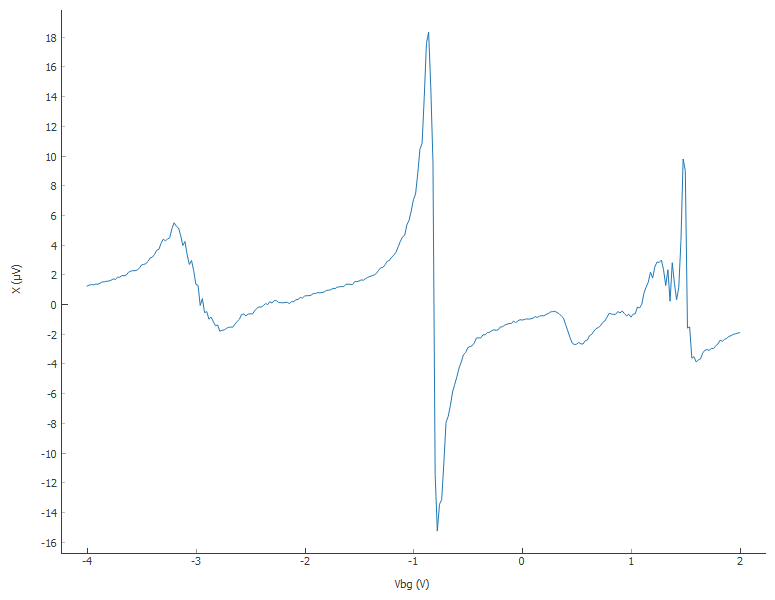

In [90]:
plot29[2]

In [91]:
triton.field_set_stable(0)

In [94]:
bgvals = np.linspace(-4, 2, 601)
Bvals = np.linspace(0, 6, 121)
data30, plot30 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-38_830_34-39_8302_33-40_3nA_0D_0to6T_fieldgate_Rxy', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-26 15:58:44
DataSet:
   location = 'data/2020-10-26/#006_S3_865_35-38_830_34-39_8302_33-40_3nA_0D_0to6T_fieldgate_Rxy_15-58-42'
   <Type>   | <array_id>                  | <array.name>     | <array.shape>
   Setpoint | triton_field_set_stable_set | field_set_stable | (121,)
   Setpoint | zeroDparam_set              | zeroDparam       | (121, 601)
   Measured | lockin865_X                 | X                | (121, 601)
   Measured | lockin865_Y                 | Y                | (121, 601)
   Measured | lockin830_X                 | X                | (121, 601)
   Measured | lockin830_Y                 | Y                | (121, 601)
   Measured | lockin830_2_X               | X                | (121, 601)
   Measured | lockin830_2_Y               | Y                | (121, 601)
Finished at 2020-10-27 20:24:52


In [ ]:
bgvals = np.linspace(-4, 2, 601)
triton.magnet_POC(1)
Bvals = np.concatenate((np.linspace(6.05, 7.95, 39), [7.998]))
data31, plot31 = npd.twod_param_sweep(triton.field_set_stable, Bvals, zeroDparam, bgvals, lockin865.X, lockin865.Y, lockin830.X, lockin830.Y, lockin830_2.X, lockin830_2.Y, SetDelay1=25, SetDelay2=1.1, Param2_SetBetween=0, DataName='S3_865_35-38_830_34-39_8302_33-40_3nA_0D_6p05to8T_fieldgate_Rxy', ZParam=[lockin865.X, lockin830.X, lockin830_2.X])
zeroDparam(0)

Started at 2020-10-27 20:24:55


In [ ]:
triton.field_set_stable(0.5)